In [5]:
import numpy as np
import math

print("np", np.__version__)

import torch
print("torch", torch.__version__)

import torch.nn as nn
import torch.nn.functional as F

from mcts_classic import MCTS
from tictactoe import TicTacToe
from resnet import ResNet

np 2.0.0
torch 2.6.0+cu124


In [ ]:
tictactoe = TicTacToe()
player = 1

state = tictactoe.get_initial_state()

In [ ]:
state

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
tictactoe.get_valid_moves(state)

array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
player = 1
action = 4
state = tictactoe.get_next_state(state, action, player)
print(state)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [ ]:
tictactoe.get_valid_moves(state)

array([1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

# Let's play tic-tac-toe

In [ ]:
# let's play TicTacToe, we'll provide the input for each player as we go until the game is over, then print the results at the end
tictactoe = TicTacToe()
state = tictactoe.get_initial_state()
player = -1
while True:
    print(state)
    valid_moves = tictactoe.get_valid_moves(state)
    print(f"Player {player}'s available moves: {[i for i in range(len(valid_moves)) if valid_moves[i] == 1]}")
    try:
        action = int(input(f"Player {player} enter your move (0-8): "))
    except ValueError:
        print("Invalid input, please enter a number between 0 and 8.")
        continue
    if valid_moves[action] != 1:
        print("Invalid move, try again.")
        continue
    state = tictactoe.get_next_state(state, action, player)
    value, terminated = tictactoe.get_value_and_terminated(state, action)
    if terminated:
        if value == 0:
            print("It's a draw!")
        else:
            print(f"Player {player} wins!")
        print(state)
        break
    player = tictactoe.get_opponent(player)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Player -1's available moves: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Invalid input, please enter a number between 0 and 8.
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Player -1's available moves: [0, 1, 2, 3, 4, 5, 6, 7, 8]
[[-1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
Player 1's available moves: [1, 2, 3, 4, 5, 6, 7, 8]
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
Player -1's available moves: [1, 2, 3, 5, 6, 7, 8]
[[-1. -1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
Player 1's available moves: [2, 3, 5, 6, 7, 8]
[[-1. -1.  0.]
 [ 1.  1.  0.]
 [ 0.  0.  0.]]
Player -1's available moves: [2, 5, 6, 7, 8]
Player -1 wins!
[[-1. -1. -1.]
 [ 1.  1.  0.]
 [ 0.  0.  0.]]


In [3]:
# %pip install matplotlib

import matplotlib.pyplot as plt

def plot_array(array, title):
    plt.figure(figsize=(5, 2))
    plt.bar(range(len(array)), array)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(title)
    plt.show()

Search #1: [0.1305625 0.0749375 0.1166875 0.079125  0.1835625 0.0871875 0.124875
 0.084875  0.1181875]


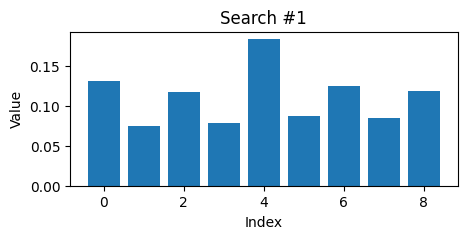

Search #2: [0.109     0.08275   0.1048125 0.0801875 0.212375  0.087625  0.1200625
 0.083     0.1201875]


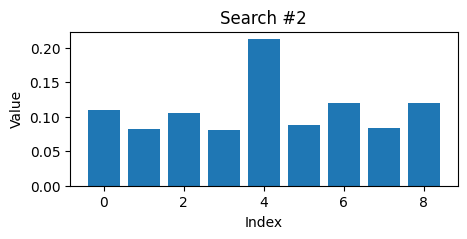

Search #3: [0.1118125 0.075     0.1126875 0.0784375 0.201125  0.085625  0.119875
 0.083625  0.1318125]


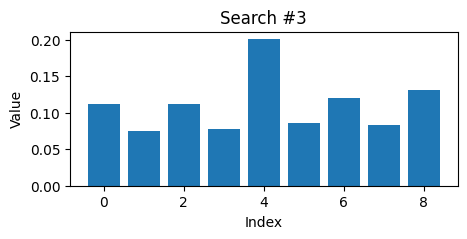

In [ ]:
# import importlib
# importlib.reload(mcts_classic)
from mcts_classic import MCTS
from tictactoe import TicTacToe


for i in range(3):
    # Define game
    game = TicTacToe()
    state = game.get_initial_state()

    # Run MCTS
    mcts = MCTS(game, {'num_searches': 1000, 'C': 1.4}, add_dirichlet_noise=False)
    # action_probs = mcts.search(state)
    action_probs = mcts.ensemble_searches(state, 16)

    # ensemble 16 searches of 1000, C=  4:                  Search #1: [0.1168 0.1018 0.113 0.098 0.137 0.101 0.1141 0.100 0.116]
    # ensemble 16 searches of  500, C=1.4: some volatility: Search #1: [0.1178 0.0914 0.113 0.079 0.182 0.089 0.1067 0.084 0.134]
    # ensemble 16 searches of 1000, C=1.4: more stable:     Search #1: [0.1228 0.0831 0.119 0.085 0.182 0.089 0.1203 0.078 0.119]
    # single     search of 100,000, C=4:                    Search #1: [0.0800 0.0428 0.088 0.040 0.481 0.044 0.0897 0.042 0.090]
    # single     search of  10,000, C=4:                    Search #1: [0.1035 0.0836 0.119 0.090 0.207 0.078 0.1207 0.081 0.113]

    print(f"Search #{i+1}: {action_probs}")
    # Plot the array
    plot_array(action_probs, f"Search #{i+1}")

# Let's play tic-tac-toe, displaying MCTS action probabilities

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


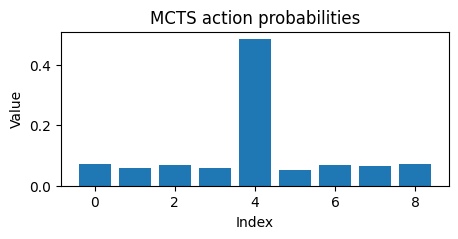

valid_moves [0, 1, 2, 3, 4, 5, 6, 7, 8]
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


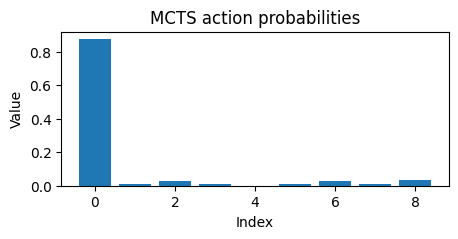

[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]


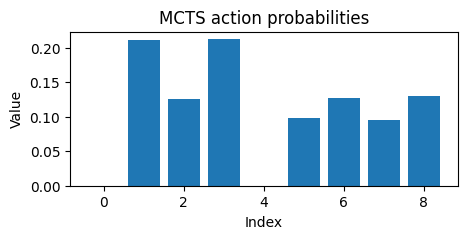

valid_moves [1, 2, 3, 5, 6, 7, 8]
[[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]


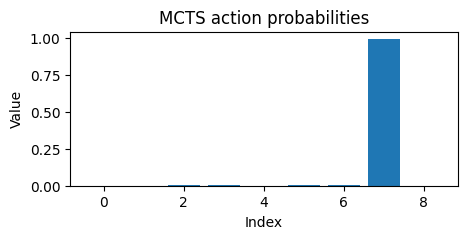

[[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0. -1.  0.]]


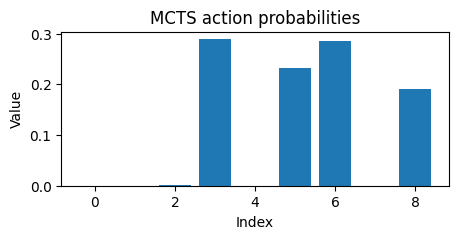

valid_moves [2, 3, 5, 6, 8]
[[-1.  1.  1.]
 [ 0.  1.  0.]
 [ 0. -1.  0.]]


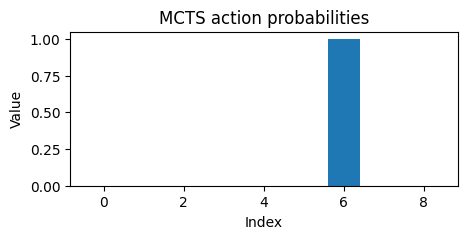

[[-1.  1.  1.]
 [ 0.  1.  0.]
 [-1. -1.  0.]]


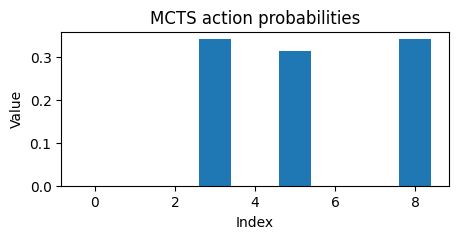

valid_moves [3, 5, 8]
[[-1.  1.  1.]
 [ 1.  1.  0.]
 [-1. -1.  0.]]


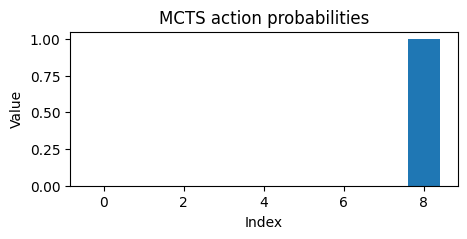

[[-1.  1.  1.]
 [ 1.  1.  0.]
 [-1. -1. -1.]]
-1 won


In [ ]:
tictactoe = TicTacToe()
player = 1

args = {
    'C': 1.41,
    'num_searches': 100000
}

mcts = MCTS(tictactoe, args)

state = tictactoe.get_initial_state()


while True:
    print(state)
    neutral_state = tictactoe.change_perspective(state, player)
    mcts_probs = mcts.search(neutral_state)
    plot_array(mcts_probs, "MCTS action probabilities")

    if player == 1:
        valid_moves = tictactoe.get_valid_moves(state)
        print("valid_moves", [i for i in range(tictactoe.action_size) if valid_moves[i] == 1])
        try:
            action = int(input(f"Player {player} enter your move (0-8): "))
        except ValueError:
            print("Invalid input, please enter a number between 0 and 8.")
            continue
        if valid_moves[action] != 1:
            print("Invalid move, try again.")
            continue            
    else:
        action = np.argmax(mcts_probs)
        
    state = tictactoe.get_next_state(state, action, player)
    
    value, is_terminal = tictactoe.get_value_and_terminated(state, action)
    
    if is_terminal:
        print(state)
        if value == 1:
            print(player, "won")
        else:
            print("draw")
        break
        
    player = tictactoe.get_opponent(player)

Backpropagated 100000 times (100.0%).
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


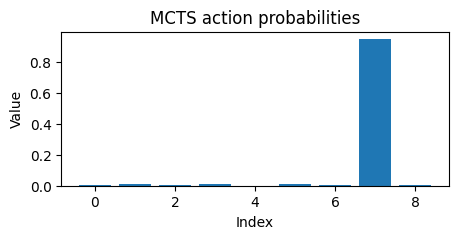

Backpropagated 100000 times (100.0%).


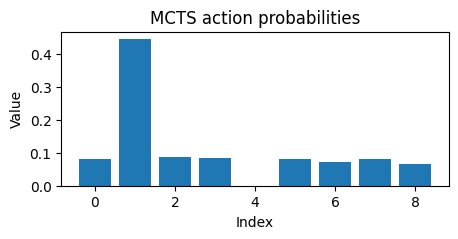

Backpropagated 100000 times (100.0%).


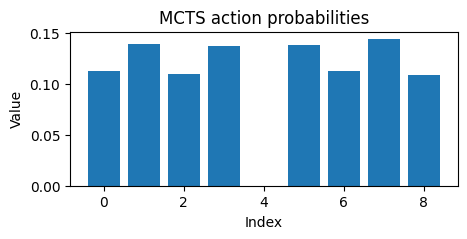

Backpropagated 100000 times (100.0%).


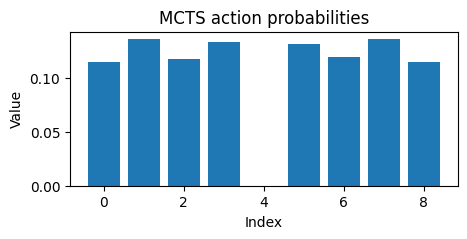

Backpropagated 100000 times (100.0%).


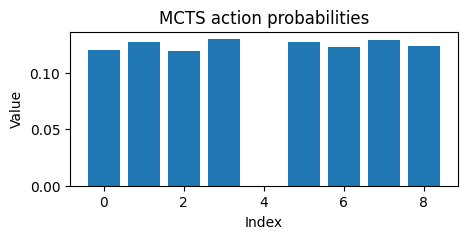

In [ ]:
from mcts_classic import MCTS
from tictactoe import TicTacToe

for i in range(5):
    tictactoe = TicTacToe()
    player = 1

    mcts = MCTS(tictactoe, {
        'C': i+0.5, #1.41, # 1, 
        'num_searches': 100000
    })

    state = tictactoe.get_initial_state()

    # move to center
    action = 4
    state = tictactoe.get_next_state(state, action, player)

    # calculate the move probabilities
    neutral_state = tictactoe.change_perspective(state, player)
    mcts_probs = mcts.search(neutral_state)
    if i == 0:
        print(state)
    plot_array(mcts_probs, "MCTS action probabilities")

# AlphaZero Model

In [ ]:
import matplotlib.pyplot as plt
from mcts_classic import MCTS
from tictactoe import TicTacToe

tictactoe = TicTacToe()

state = tictactoe.get_initial_state()
state = tictactoe.get_next_state(state, 2, 1)
state = tictactoe.get_next_state(state, 7, -1)

print(state)

[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0. -1.  0.]]


In [ ]:
encoded_state = tictactoe.get_encoded_state(state)
print(encoded_state.shape)
print(encoded_state)

(3, 3, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [ ]:
tensor_state = torch.tensor(encoded_state).unsqueeze(0)
print(tensor_state.shape)
print(tensor_state)

torch.Size([1, 3, 3, 3])
tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]])


policy:
torch.Size([1, 9])
tensor([[ 0.1377, -0.2732,  0.3071,  0.4243,  0.0084, -0.0054, -0.0846,  0.2557,
          0.5402]], grad_fn=<AddmmBackward0>)
value:
torch.Size([1, 1])
tensor([[-0.0345]], grad_fn=<TanhBackward0>)

cleaned up:
value: -0.034514229744672775
policy softmax: [0.10699388 0.07094447 0.12674972 0.1425051  0.09401292 0.09272771
 0.08566779 0.12038848 0.16000992]


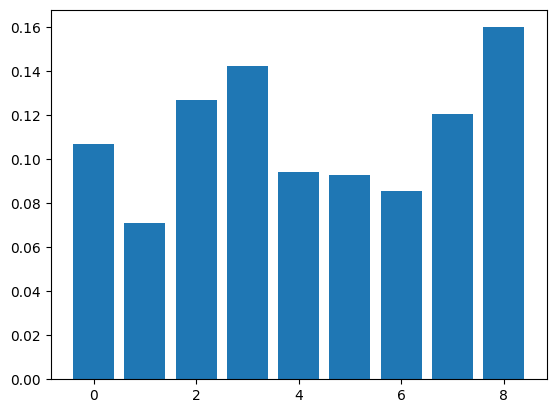

In [ ]:

# Run the model on the state
# (of course, the output is just random, since the model is not trained yet!)
model = ResNet(tictactoe, num_resBlocks=4, num_hidden=64)
policy, value = model(tensor_state)
print("policy:")
print(policy.shape)
print (policy)
print("value:")
print(value.shape)
print(value)

value = value.item()
policy = torch.softmax(policy, dim=1).squeeze(0).detach().cpu().numpy()

print("\ncleaned up:")
print("value:", value)
print("policy softmax:", policy)

plt.bar(range(len(policy)), policy)
plt.show()


## Let's play tic-tac-toe - AlphaZeroMCTS with untrained network

Still works for tic-tac-toe, if num_searches is 1000 or so. Not too smart if num_searches is 10.

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


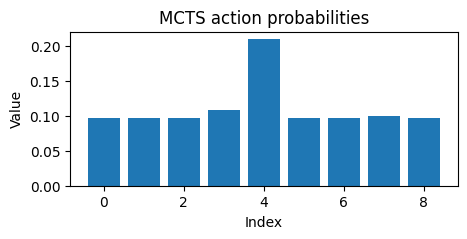

valid_moves [0, 1, 2, 3, 4, 5, 6, 7, 8]
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


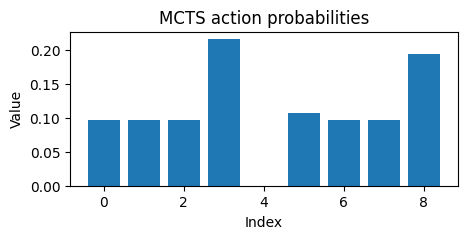

[[ 0.  0.  0.]
 [-1.  1.  0.]
 [ 0.  0.  0.]]


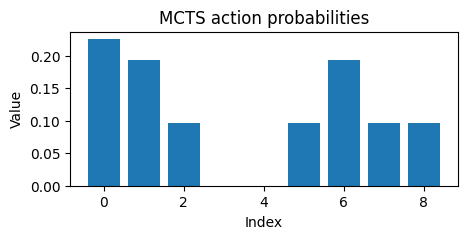

valid_moves [0, 1, 2, 5, 6, 7, 8]
[[ 0.  0.  0.]
 [-1.  1.  0.]
 [ 0.  0.  1.]]


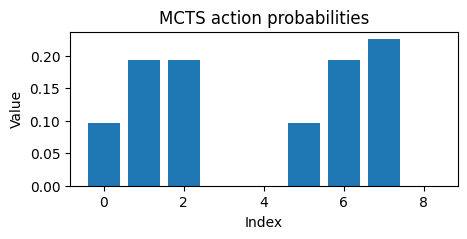

[[ 0.  0.  0.]
 [-1.  1.  0.]
 [ 0. -1.  1.]]


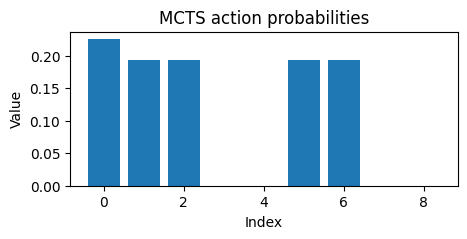

valid_moves [0, 1, 2, 5, 6]
[[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 0. -1.  1.]]
1 won


In [ ]:
tictactoe = TicTacToe()
player = 1

args = {
    'C': 2,
    'num_searches': 1000
}

model = ResNet(tictactoe, num_resBlocks=4, num_hidden=64)
model.eval() # set the model to evaluation mode

mcts = MCTS(tictactoe, args, model)

state = tictactoe.get_initial_state()


while True:
    print(state)
    neutral_state = tictactoe.change_perspective(state, player)
    mcts_probs = mcts.search(neutral_state)
    plot_array(mcts_probs, "MCTS action probabilities")

    if player == 1:
        valid_moves = tictactoe.get_valid_moves(state)
        print("valid_moves", [i for i in range(tictactoe.action_size) if valid_moves[i] == 1])
        try:
            action = int(input(f"Player {player} enter your move (0-8): "))
        except ValueError:
            print("Invalid input, please enter a number between 0 and 8.")
            continue
        if valid_moves[action] != 1:
            print("Invalid move, try again.")
            continue            
    else:
        action = np.argmax(mcts_probs)
        
    state = tictactoe.get_next_state(state, action, player)
    
    value, is_terminal = tictactoe.get_value_and_terminated(state, action)
    
    if is_terminal:
        print(state)
        if value == 1:
            print(player, "won")
        else:
            print("draw")
        break
        
    player = tictactoe.get_opponent(player)

# AlphaZero Self-Play


In [ ]:
from alpha_zero import AlphaZero
from tictactoe import TicTacToe
from resnet import ResNet
import torch

tictactoe = TicTacToe()

model = ResNet(tictactoe, 4, 64)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

args = {
    'C': 2,
    'num_searches': 60,
    'num_iterations': 3,
    'num_selfPlay_iterations': 500,
    'num_epochs': 4,
    'batch_size': 64,
}

alphaZero = AlphaZero(model, optimizer, tictactoe, args)
alphaZero.learn()

  0%|          | 0/3 [00:00<?, ?it/s]

## Let's play with the trained model

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


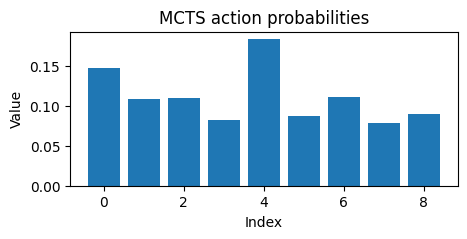

valid_moves [0, 1, 2, 3, 4, 5, 6, 7, 8]
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


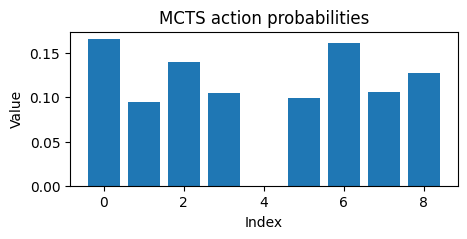

[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]


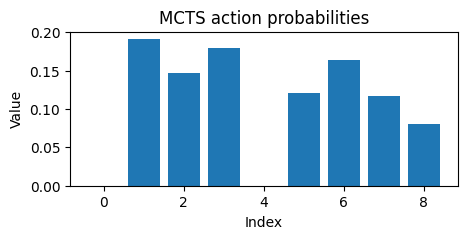

valid_moves [1, 2, 3, 5, 6, 7, 8]
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]]


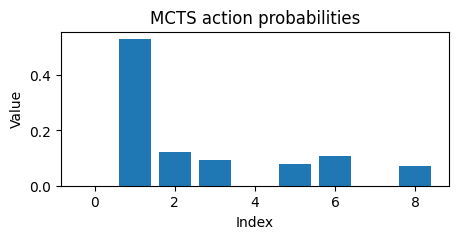

[[-1. -1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]]


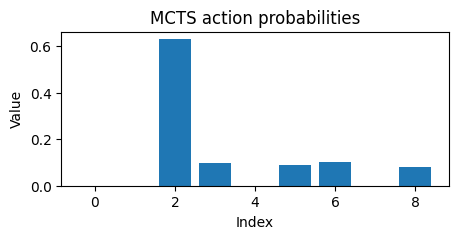

valid_moves [2, 3, 5, 6, 8]
Invalid move, try again.
[[-1. -1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]]


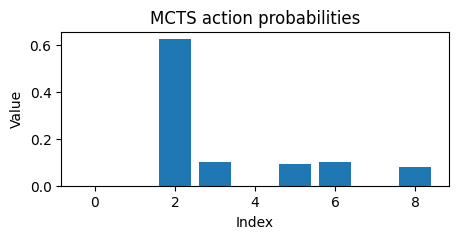

valid_moves [2, 3, 5, 6, 8]
[[-1. -1.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]]


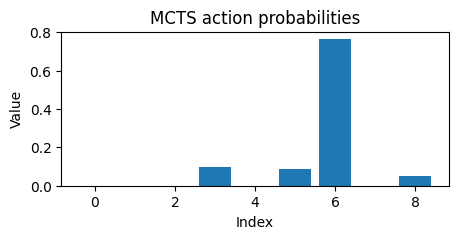

[[-1. -1.  1.]
 [ 0.  1.  0.]
 [-1.  1.  0.]]


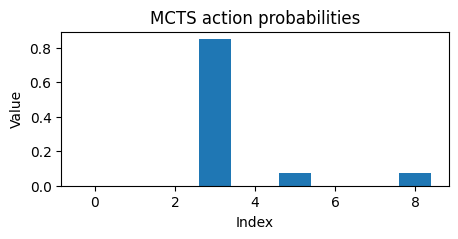

valid_moves [3, 5, 8]
[[-1. -1.  1.]
 [ 1.  1.  0.]
 [-1.  1.  0.]]


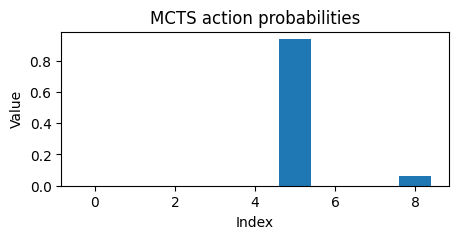

[[-1. -1.  1.]
 [ 1.  1. -1.]
 [-1.  1.  0.]]


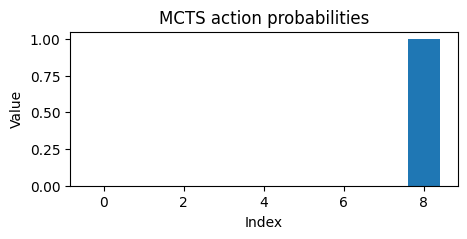

valid_moves [8]
[[-1. -1.  1.]
 [ 1.  1. -1.]
 [-1.  1.  1.]]
draw


In [6]:
tictactoe = TicTacToe()
player = 1

args = {
    'C': 2,
    'num_searches': 1000
}

# model = ResNet(tictactoe, num_resBlocks=4, num_hidden=64)
# reuse the model from earlier training
model.eval() # set the model to evaluation mode

mcts = MCTS(tictactoe, args, model)

state = tictactoe.get_initial_state()

while True:
    print(state)
    neutral_state = tictactoe.change_perspective(state, player)
    mcts_probs = mcts.search(neutral_state)
    plot_array(mcts_probs, "MCTS action probabilities")

    if player == 1:
        valid_moves = tictactoe.get_valid_moves(state)
        print("valid_moves", [i for i in range(tictactoe.action_size) if valid_moves[i] == 1])
        try:
            action = int(input(f"Player {player} enter your move (0-8): "))
        except ValueError:
            print("Invalid input, please enter a number between 0 and 8.")
            continue
        if valid_moves[action] != 1:
            print("Invalid move, try again.")
            continue            
    else:
        action = np.argmax(mcts_probs)
        
    state = tictactoe.get_next_state(state, action, player)
    
    value, is_terminal = tictactoe.get_value_and_terminated(state, action)
    
    if is_terminal:
        print(state)
        if value == 1:
            print(player, "won")
        else:
            print("draw")
        break
        
    player = tictactoe.get_opponent(player)